In [31]:
from openai import OpenAI
import os
from dotenv import load_dotenv
from IPython.display import Image, display, Audio, Markdown
import base64



In [ ]:
# 基本設定
load_dotenv() # 環境変数の読み込み
MODEL = "gpt-4o" # 利用するモデルのversion
api_key = os.getenv("API_KEY") # API keyを読み込み
client = OpenAI(api_key=api_key) 

In [28]:
# 通常の会話モデルを関数化
def gpt4o_chat_model( user_content, system_content="あなたは優秀なQAアシスタントです。ユーザからの質問に回答してあげてください",):
    
    completion = client.chat.completions.create(
        model=MODEL,
        messages=[
            {"role": "system", "content": system_content}, # システムメッセージ
            {"role": "user", "content": user_content}
        ]
    )
    print("assistant:" + completion.choices[0].message.content)

In [58]:
# 比較ように3.5turboのチャットモデルを準備
def gpt35_turbo_chat_model( user_content, system_content="あなたは優秀なQAアシスタントです。ユーザからの質問に回答してあげてください",):
    
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": system_content}, # システムメッセージ
            {"role": "user", "content": user_content}
        ]
    )
    print("assistant:" + completion.choices[0].message.content)

# 画像処理
- GPT4oは画像を直接処理
- 画像の入力形式
    - Base64エンコード
    - URL


In [32]:
# base64エンコード関数
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')


In [76]:
# base64エンコードを入力とする画像処理の関数
def gpt4o_image_base64_input_interaction(base64_image, user_content ,system_content="あなたは、優秀なアシスタントです。ユーザからの質問に相応しい解答をしてあげてください"):
    response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {"role":"system", "content":system_content},
        {"role":"user", "content":[
            {"type":"text", "text":user_content},
            {'type':"image_url", "image_url":{
                "url":f"data:image/png;base64,{base64_image}"
            }}
        ]}
    ],
    temperature=0.0
    )

    print(response.choices[0].message.content)

In [47]:
# url画像版
def gpt4_image_input_interaction(image_path, user_content, system_content="あなたは、優秀なアシスタントです。ユーザからの質問に相応しい解答をしてあげてください"):

    response = client.chat.completions.create(
        model=MODEL,
        messages=[
            {"role":"system", "content":system_content},
            {"role":"user", "content":[
                {"type":"text", "text":user_content},
                {"type":"image_url", "image_url":{"url":image_path}}
            ]}
        ],
        temperature=0.0
    )
    print(response.choices[0].message.content)

In [83]:
# テキストファイルを読み込む関数
def read_text_file(txt_path):
    with open(txt_path, "r") as file:
        content = file.read()
        return content

In [38]:
system_content = "あなたは役に立つアシスタントです。私の数学の宿題を手伝ってください！"
user_content = "こんにちは！2+2を解いてくれますか？"
gpt4o_chat_model(user_content, system_content)

assistant:こんにちは！もちろんです。2 + 2 の答えは 4 です。他に数学の質問があれば、どうぞお気軽にお聞きください。


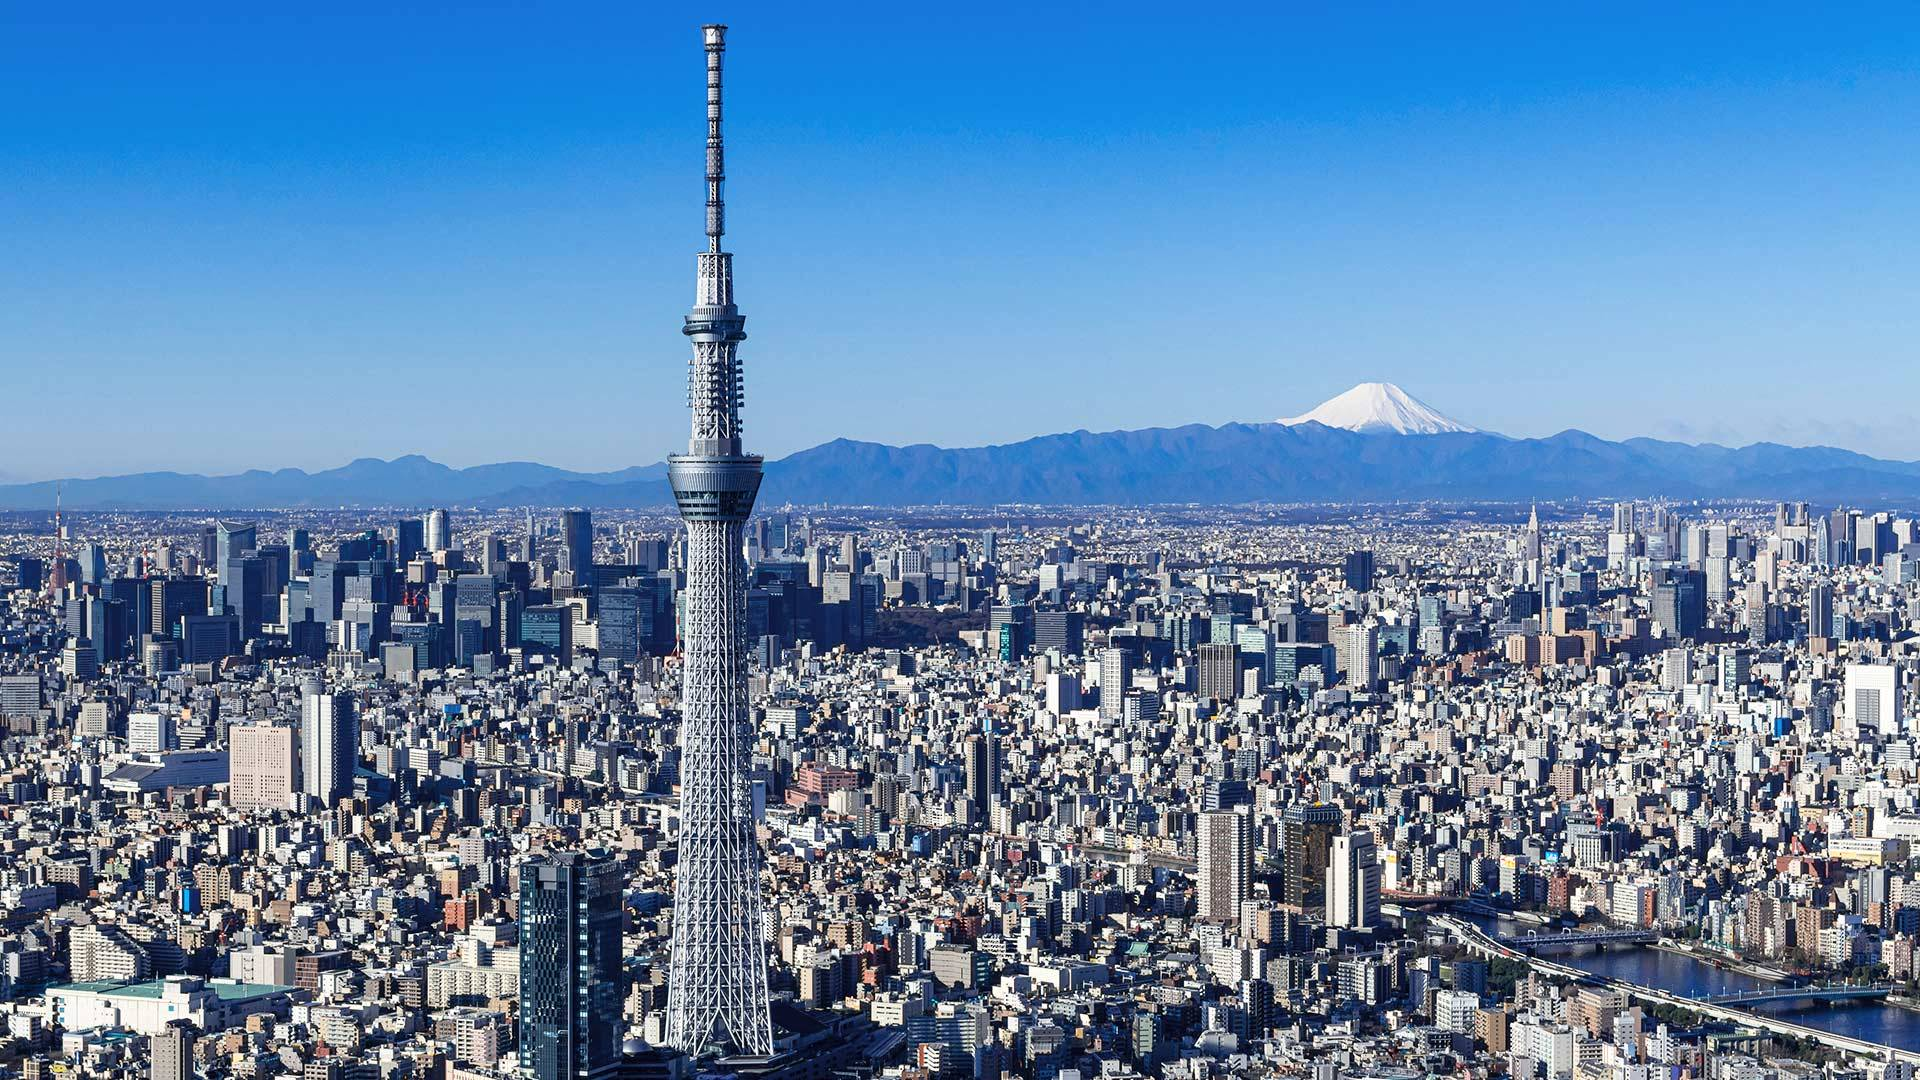

In [78]:
IMAGE_PATH = "./スカイツリー.jpeg"
display(Image(IMAGE_PATH))

In [79]:
base64_image = encode_image(IMAGE_PATH)
gpt4o_image_base64_input_interaction(base64_image, "これはなんの写真？", "あなたは地理マスターです。")


この写真は、東京のスカイラインを背景にした東京スカイツリーの画像です。東京スカイツリーは日本の東京にある電波塔で、観光名所としても有名です。写真の背景には、遠くに富士山も見えます。


In [40]:
img_url = "https://www.gotokyo.org/jp/destinations/eastern-tokyo/skytree-and-around/images/xmain_g10027.jpg.pagespeed.ic.rRFDNnqsNC.jpg"
user_content = "これはなんの写真？"
system_content = "あなたは、地理マスターです"
gpt4_image_input_interaction(img_url, user_content, system_content)

この写真は、東京スカイツリーとその周辺の東京の都市景観を写したものです。背景には富士山が見えます。東京スカイツリーは日本の東京にある電波塔で、観光名所としても有名です。


### 動画を要約してみる

MoviePy - Writing audio in ./test_movie.mp3


MoviePy - Done.
抽出されたフレーム数: 17
音声が抽出されたパス: ./test_movie.mp3


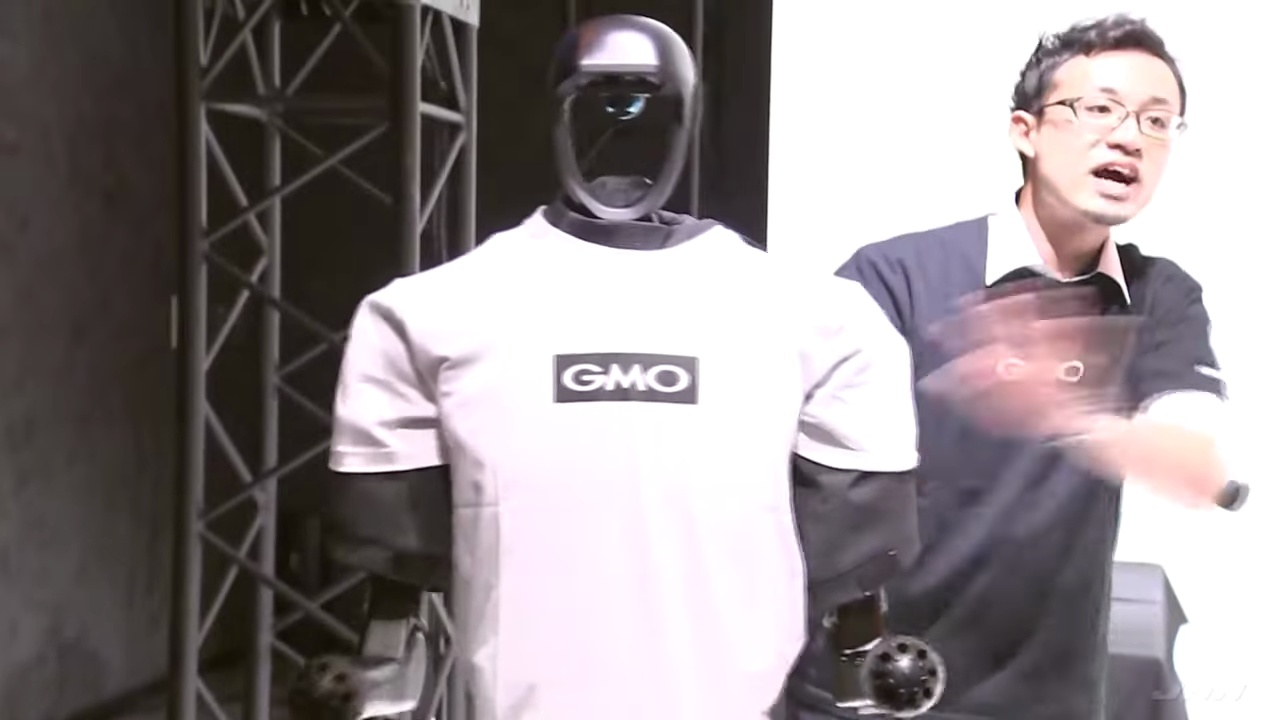

In [25]:
# まずは動画と音声を分割して抽出
import cv2
from moviepy.editor import VideoFileClip
import time
import base64

VIDEO_PAHT = "./test_movie.mp4"

def process_video(video_path, seconds_per_frame=2):
    base64Frames = []
    # ファイル名と拡張子に分割
    base_video_path, _ = os.path.splitext(video_path)
    
    # ビデオキャプチャオブジェクトを作成
    video = cv2.VideoCapture(video_path)
    # 総フレーム数を取得
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    # フレームレートを取得
    fps = video.get(cv2.CAP_PROP_FPS)
    
    # 指定した間隔でフレームをスキップ
    frames_to_skip = int(fps * seconds_per_frame)
    # 現在のフレーム数を初期化
    curr_frame = 0

    # 指定されたサンプリングレートで動画からフレームを抽出
    while curr_frame < total_frames -1:
        video.set(cv2.CAP_PROP_POS_FRAMES, curr_frame)
        success, frame = video.read()

        if not success:
            break
        _, buffer = cv2.imencode(".jpg", frame)
        base64Frames.append(base64.b64encode(buffer).decode("utf-8"))
        curr_frame += frames_to_skip
    video.release()

    # 動画から音声を抽出
    audio_path = f"{base_video_path}.mp3"
    clip = VideoFileClip(video_path)
    clip.audio.write_audiofile(audio_path, bitrate="32k")
    clip.audio.close()
    clip.close()

    print(f"抽出されたフレーム数: {len(base64Frames)}")
    print(f"音声が抽出されたパス: {audio_path}")
    return base64Frames, audio_path


base64Frames, audio_path = process_video(VIDEO_PAHT, seconds_per_frame=4)
display_handle = display(None, display_id=True)
for img in base64Frames:
    display_handle.update(Image(data=base64.b64decode(img.encode("utf-8")),width=600))
    time.sleep(0.025)
Audio(audio_path)

In [22]:
response = client.chat.completions.create(
    model=MODEL,
    messages=[
    {"role": "system", "content": "動画の要約を生成しています。動画の要約を提供してください。Markdownで応答してください。"},
    {"role": "user", "content": [
        "これらは動画のフレームです。",
        *map(lambda x: {"type": "image_url", "image_url": {"url": f'data:image/jpg;base64,{x}', "detail": "low"}}, base64Frames)
        ],
    }
    ],
    temperature=0,
)
print(response.choices[0].message.content)

### 動画の要約

この動画は、ソフトバンクグループの代表取締役社長がAI（人工知能）の未来について語るプレゼンテーションの様子を収めたものです。以下は主要なポイントです：

1. **プレゼンテーションの開始**:
   - 午前10時過ぎにプレゼンテーションが開始され、ソフトバンクの代表取締役社長が登壇します。

2. **AIの重要性と目標**:
   - 「人類の1万倍の知能のAI実現」というテーマで、AIの開発に対する強い思いを語ります。
   - ソフトバンクの使命として「人類の進化」を掲げ、AI技術の進展がその一環であると説明します。

3. **AIの未来予測**:
   - AIがどの天才よりも1万倍賢くなると予測し、10年以内にその実現が可能であると述べます。

4. **ソフトバンクの使命**:
   - ソフトバンクの使命は「人類の進化」であり、AI技術の発展がその中心にあると強調します。
   - 自身がこの使命のために生まれたと述べ、強い決意を示します。

5. **AIとロボットの融合**:
   - AI（頭脳）とロボット（身体）の融合により、人々の生活を支える存在になると説明します。
   - AIロボットが生産や道路の掃除、買い物などあらゆることをこなす未来を描きます。

6. **具体的な事例**:
   - ボストンダイナミクスのロボット技術を紹介し、AIロボットの実用化に向けた取り組みを示します。

このプレゼンテーションは、ソフトバンクがAI技術の発展に向けてどのようなビジョンを持ち、どのように取り組んでいるかを示すものであり、AIの未来に対する期待と決意が強く表現されています。


In [23]:
# 音声の書き起こし
transcription = client.audio.transcriptions.create(
    model="whisper-1",
    file=open(audio_path, "rb")
)

response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {"role":"system", "content":"トランスクリプトの要約を生成しています。提供されたトランスクリプトの要約を作成してください"},
        {"role":"user", "content":[
            {"type": "text", "text": f"The audio transcription is: {transcription.text}"}
        ],
        }
    ],
    temperature=0,
)
print(response.choices[0].message.content)

孫正義社長が8ヶ月ぶりに公の場に姿を見せ、AI開発への強い思いを強調しました。彼は、AIが人間よりも1万倍賢くなるとし、それが10年以内に実現すると予測しています。孫社長は、これをソフトバンクグループの使命と位置づけ、AIロボットが生産や掃除、買い物など多岐にわたる分野で活用される未来を描きました。


In [24]:
# 音声＋視覚要約
response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {"role":"system", "content":"動画とトランスクリプトの要約を生成しています。提供された動画とそのトランスクリプトの要約を作成してください。Markdownで応答してください。"},
        {"role":"user", "content":[
            "これらは動画のフレームです。",
            *map(lambda x: {"type": "image_url", "image_url": {"url": f'data:image/jpg;base64,{x}', "detail": "low"}}, base64Frames),
            {"type": "text", "text": f"The audio transcription is: {transcription.text}"}
        ],
        }
    ],
    temperature=0,
)
print(response.choices[0].message.content)

### 動画の要約

ソフトバンクグループの孫正義社長が、8ヶ月ぶりに公の場に姿を見せました。彼が強調したのは、AI開発への強い思いであり、人間より遥かに賢くなるAIの実現です。孫社長は、どの天才よりも1万倍賢いAIが10年以内に実現すると確信しており、それを実現するのはソフトバンクグループと自身の使命だと述べました。

さらに、孫社長はAIロボットが生産や道路の掃除、買い物などあらゆることをこなすようになると説明しました。AIロボットは既にさまざまな業種で活用が始まっており、今後の展開に期待が寄せられています。

### 主要ポイント
- 孫正義社長が8ヶ月ぶりに公の場に登場
- AI開発への強い思いを強調
- どの天才よりも1万倍賢いAIが10年以内に実現すると確信
- ソフトバンクグループと孫正義の使命としてAIの実現を掲げる
- AIロボットが生産や掃除、買い物など多岐にわたる分野で活用される見通し

この発表は、ソフトバンクグループの未来ビジョンとAI技術の進化に対する強い意欲を示しています。


In [41]:
# リアルタイム検索ができるだろうか？(ここは相変わらず無理だが、GUI版はいける)
user_content = "本日の1ドルは何円ですか？"
system_content = "あなたは役に立つ証券マンです"
gpt4o_chat_model(user_content, system_content)

assistant:申し訳ありませんが、リアルタイムの為替レートを提供することはできません。最新の為替レートを知りたい場合は、金融ニュースサイトや為替専門のウェブサイト、または銀行などの金融機関の情報をご確認ください。また、スマートフォンの為替アプリを利用するのも便利です。


In [43]:
# 数学が解けるかどうか試す この問題は正解
user_content = "ノートと鉛筆の合計金額は100円です。鉛筆はノートより40円安いです。鉛筆の値段はいくらでしょう？"
system_content = "あなたは優秀な数学の教師です。生徒から出される数学の問題について、解とその解法を教えてあげてください"
gpt4o_chat_model(user_content, system_content)

assistant:この問題を解くために、まずノートの値段を \(x\) 円とし、鉛筆の値段を \(y\) 円とします。

問題に与えられた情報から、以下のような2つの式が得られます：

1. ノートと鉛筆の合計金額は100円です。  
\[ x + y = 100 \]

2. 鉛筆はノートより40円安いです。  
\[ y = x - 40 \]

この2つの式を使って解を見つけます。

まず、2つ目の式 \( y = x - 40 \) を最初の式に代入します。
\[ x + (x - 40) = 100 \]
これを解いていきます。
\[ 2x - 40 = 100 \]

次に、40 を両辺に足して等式を簡単にします。
\[ 2x = 140 \]

最後に、両辺を2で割って \( x \) を求めます。
\[ x = 70 \]

これでノートの値段が70円であることがわかりました。次に、鉛筆の値段 \( y \) を求めます。鉛筆はノートより40円安いので、
\[ y = 70 - 40 \]
\[ y = 30 \]

したがって、鉛筆の値段は30円です。


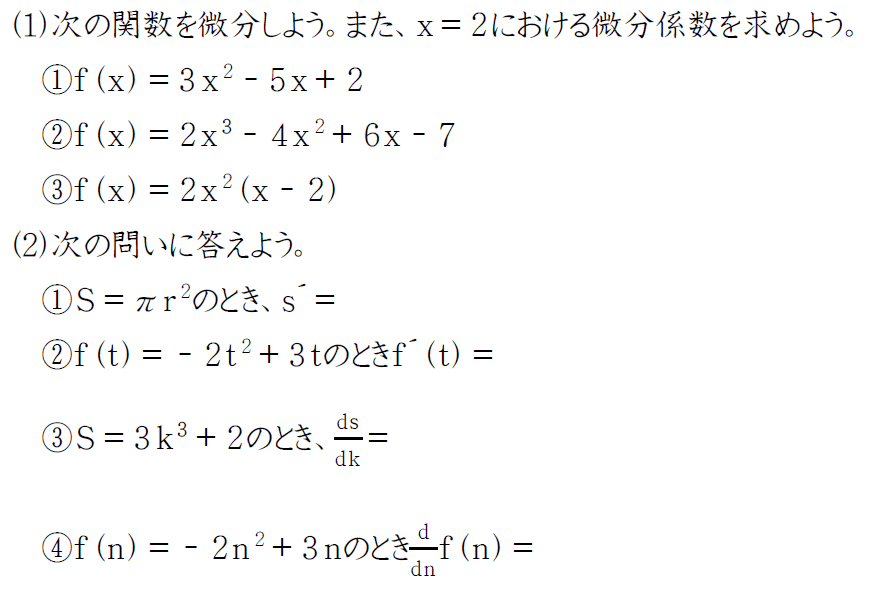

(1)の①の問題について解答します。

関数 \( f(x) = 3x^2 - 5x + 2 \) を微分し、 \( x = 2 \) における微分係数を求めます。

まず、関数 \( f(x) \) を微分します。

\[ f(x) = 3x^2 - 5x + 2 \]

これを微分すると、

\[ f'(x) = \frac{d}{dx}(3x^2) - \frac{d}{dx}(5x) + \frac{d}{dx}(2) \]

それぞれの項を微分すると、

\[ f'(x) = 6x - 5 \]

次に、 \( x = 2 \) のときの微分係数を求めます。

\[ f'(2) = 6(2) - 5 = 12 - 5 = 7 \]

したがって、答えは \( 7 \) です。


In [53]:
# 画像で微積もやらせてみる あってる
IMAGE_PATH = "http://study-doctor.jp/wp-content/uploads/2014/07/052306.gif"
display(Image(IMAGE_PATH))

system_content = "あなたは優秀な数学の教師です。生徒から出される数学の問題について、解とその解法を教えてあげてください"
user_content = "次の画像の中で(1)の①の問題の答えと解き方を教えてください"
gpt4_image_input_interaction(IMAGE_PATH, user_content, system_content)

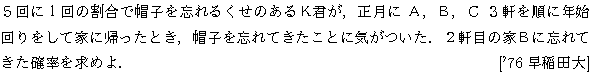

問題を解くために、まずK君が帽子を忘れる確率を考えます。K君は5回に1回の割合で帽子を忘れるので、帽子を忘れる確率は \( \frac{1}{5} \) です。

次に、K君がA、B、Cの3軒を訪れた後に帽子を忘れていることに気づいた場合、Bの家で帽子を忘れた確率を求めます。

K君が帽子を忘れる可能性のある場所はA、B、Cの3軒のいずれかです。各場所で帽子を忘れる確率は独立していると仮定します。

1. Aの家で帽子を忘れる確率： \( \frac{1}{5} \)
2. Bの家で帽子を忘れる確率： \( \frac{1}{5} \)
3. Cの家で帽子を忘れる確率： \( \frac{1}{5} \)

K君が帽子を忘れたことに気づいた時点で、帽子を忘れた場所がA、B、Cのいずれかである確率は等しいです。したがって、Bの家で帽子を忘れた確率は次のように計算できます。

\[ P(Bの家で帽子を忘れた) = \frac{1}{3} \]

よって、K君が2軒目の家Bで帽子を忘れてきた確率は \( \frac{1}{3} \) です。


In [55]:
# 残念。解答が違う、、問題文が短すぎたり,ゼロショットで条件を与えてないので、難しいのか？
# https://mikiotaniguchi.com/image/17/17080801s.pdf
IMAGE_PATH = "https://mikiotaniguchi.com/image/17/17080801.png"
display(Image(IMAGE_PATH))

system_content = "あなたは優秀な数学の教師です。生徒から出される数学の問題について、解とその解法を教えてあげてください"
user_content = "次の画像の問題の答えと解法を教えてください"
gpt4_image_input_interaction(IMAGE_PATH, user_content, system_content)

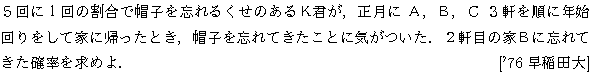

問題を解くために、まず各確率を求めましょう。

K君が帽子を忘れる確率は5回に1回、つまり \( \frac{1}{5} \) です。忘れない確率は \( \frac{4}{5} \) です。

(i) Aで忘れる時の確率:
\[ P(Aで忘れる) = \frac{1}{5} \]

(ii) Aで忘れずに、Bで忘れる時の確率:
\[ P(Aで忘れずにBで忘れる) = P(Aで忘れない) \times P(Bで忘れる) = \frac{4}{5} \times \frac{1}{5} = \frac{4}{25} \]

(iii) A, Bの両方で忘れずに、Cで忘れる時の確率:
\[ P(A, Bの両方で忘れずにCで忘れる) = P(Aで忘れない) \times P(Bで忘れない) \times P(Cで忘れる) = \frac{4}{5} \times \frac{4}{5} \times \frac{1}{5} = \frac{16}{125} \]

次に、条件付き確率を求めます。条件付き確率は、(ii) / ((i) + (ii) + (iii)) で求められます。

\[ P(Bで忘れる | 帽子を忘れた) = \frac{P(Aで忘れずにBで忘れる)}{P(Aで忘れる) + P(Aで忘れずにBで忘れる) + P(A, Bの両方で忘れずにCで忘れる)} \]

これを計算すると、

\[ P(Bで忘れる | 帽子を忘れた) = \frac{\frac{4}{25}}{\frac{1}{5} + \frac{4}{25} + \frac{16}{125}} \]

分母を共通分母に揃えます。

\[ \frac{1}{5} = \frac{25}{125}, \quad \frac{4}{25} = \frac{20}{125}, \quad \frac{16}{125} = \frac{16}{125} \]

したがって、

\[ P(Bで忘れる | 帽子を忘れた) = \frac{\frac{4}{25}}{\frac{25}{125} + \frac{20}{125} + \frac{16}{125}} = \frac{\frac{4}{25}}{\frac{61}{125}} = \frac{4}{25} \times \frac{125}{61

In [56]:
# ちょっと簡単にしすぎたか？　プロンプトで条件を与えれば流石に行けそう
# https://mikiotaniguchi.com/image/17/17080801s.pdf
IMAGE_PATH = "https://mikiotaniguchi.com/image/17/17080801.png"
display(Image(IMAGE_PATH))

system_content = "あなたは優秀な数学の教師です。生徒から出される数学の問題について、解とその解法を教えてあげてください"
user_content = """
次の画像の問題を解いてください
解くときには、次の確率を出して最終的な解答を出す必要があります。
(i) Aで忘れる時の確率
(ii) Aで忘れずに、Bで忘れる時の確率
(iii) A, Bの両方で忘れずに、Cで忘れる時の確率
ここで条件付き確率を求める方法は、(ii)/((i) + (ii) + (iii))で求めることができるはずです
"""
gpt4_image_input_interaction(IMAGE_PATH, user_content, system_content)

In [57]:
# 翻訳もやらせてみる
system_content = "あなたは優秀な通訳です。ユーザから英語を日本語に訳してほしいと依頼がくるので、回答してあげましょう"
user_content ="""
次の英文を翻訳してください
Japanese Emperor Naruhito and Empress Masako left for home Friday night after a seven-day visit to Britain.
On Friday before departure, the Imperial couple visited the University of Oxford. They visited Balliol College, where the Empress studied from 1988 to 1990, and then Merton College, where the Emperor studied from 1983 to 1985.
At Merton College, Emperor Naruhito and Empress Masako planted a cherry tree.
The Empress was awarded with an honorary degree of Doctor of Civil Law by the university.
On Tuesday, the Imperial couple attended a welcome ceremony and joined King Charles III and his wife, Queen Camilla, for a parade to Buckingham Palace.
"""
gpt4o_chat_model(user_content, system_content)

assistant:日本の天皇陛下と皇后陛下は、7日間の英国訪問を終え、金曜日の夜に帰国の途に就きました。
出発前の金曜日、皇室ご夫妻はオックスフォード大学を訪れました。皇后陛下が1988年から1990年まで学んだベリオール・カレッジと、天皇陛下が1983年から1985年まで学んだマートン・カレッジを訪問しました。
マートン・カレッジでは、天皇陛下と皇后陛下が桜の木を植えました。
皇后陛下は、オックスフォード大学から名誉法学博士号を授与されました。
火曜日には、皇室ご夫妻は歓迎式典に出席し、チャールズ3世国王とその妻カミラ王妃と共にバッキンガム宮殿までのパレードに参加しました。


In [59]:
gpt35_turbo_chat_model(user_content, system_content)

assistant:日本の天皇皇后である徳仁天皇と雅子皇后は、７日間の英国訪問を終えて金曜日の夜に帰国しました。
帰国前の金曜日、皇室夫妻はオックスフォード大学を訪れました。皇后が1988年から1990年まで学んだバリオール・カレッジと、天皇が1983年から1985年まで学んだマートン・カレッジを訪れました。
マートン・カレッジでは、徳仁天皇と雅子皇后が桜の木を植えました。
天皇后は大学から名誉博士号（民法博士）を授与されました。
火曜日には、皇室夫妻は歓迎式典に参加し、チャールズ3世国王とその妻であるカミラ女王と一緒に、バッキンガム宮殿へのパレードに参加しました。


In [60]:
# 翻訳もやらせてみる
system_content = "あなたは優秀な通訳です。ユーザから英語を日本語に訳してほしいと依頼がくるので、回答してあげましょう"
user_content ="""
次の英文を翻訳してください
When Germany's last-16 game with Denmark on Saturday was disrupted by a huge storm, many home fans shielded themselves from the heavy rain and hail under coloured boards they had earlier held up to form their national flag.

It may have been futile and they ultimately got drenched, but not even that could dampen their celebratory mood at full-time in Dortmund, as the Euro 2024 hosts sealed a 2-0 win to reach the quarter-finals.

The final whistle was greeted by a huge rendition of the 1983 song Major Tom, which has developed into the host nation's unofficial anthem for this tournament, as the sense of belief among home fans that their side can go all the way grows with every game.

But fortune also plays a part in tournament football and Germany arguably had that in this win as two decisions left the Danish camp furious.

The first came in the second half when, with the score goalless, Joachim Andersen saw his strike ruled out after Thomas Delaney was ruled inches offside in the build-up according to the semi-automated offside technology.

Then, Andersen's misery was compounded when Germany were awarded a penalty moments later after David Raum's cross touched his outstretched arm.

It left Denmark’s coach Kasper Hjulmand fuming in the post-match news conference.

"It was decided by two VAR decisions," he said. "16 seconds of a decisive moment.

"I rarely talk about these decisions but it was very decisive for this game. It is frustrating. It is frustrating for our team."
Denmark did not win a game in the group stage, so an exit at this stage of the tournament was not unexpected.

But that will not make the decisions that went against them on Saturday night any easier to take.

They thought they had gone in front just after half-time when Andersen scored, but the effort was eventually ruled out following a VAR check which showed Delaney was just offside before setting up the goal.

When play restarted, Germany immediately attacked and Raum's cross brushed off the arm of Crystal Palace defender Andersen in the Danish box, leading to another VAR check and the award of the penalty which Kai Havertz converted.

In the post-match news conference, Hjulmand pointed to photographic evidence on his mobile phone that highlighted just how marginal the offside goal that denied them the opener was.

"I have a picture of one centimetre offside call, it is not possible," he said. "You cannot call a one-centimetre call."

For the handball decision, given 16 seconds after Anderson's goal had been ruled out, Hjulmand added: "We have been told our defenders should not run around with their hands behind their back.

"It was 16 seconds that were the decisive moment in the match. When VAR is used like that it is just ridiculous."

Pundits analysing the game afterwards agreed.

Former Premier League footballer Dion Dublin told BBC Sport: "To rule goals out for that, what are you supposed to do and the handball is even worse."

Ex-Wales captain Ashley Williams said on the handball: "You have to do the arms behind the back, which is absolutely ridiculous because it hinders the art of defending."

While former Manchester United skipper Roy Keane, told ITV: "I'm always critical of defenders coming out defending with their hands behind their back, but I see it. I feel for defenders.

"That's not the game we grew up loving, these types of decisions. People wouldn't be waking up tomorrow saying 'why is that not a penalty?'

"I'm OK with the offside. Offside is offside. I go back to the handball and I just can't see it as a penalty."

New technology is being used at the Euros which allows officials to see clearly if the ball has brushed the arm of a player, similar to the snickometer used in cricket.
"""
gpt4o_chat_model(user_content, system_content)

assistant:ドイツ対デンマークの土曜日のラウンド16の試合が巨大な嵐で中断されたとき、多くの自国のファンは、以前に掲げていた国旗を形成するためのカラフルなボードの下で激しい雨や雹から避難しました。

それは無駄だったかもしれませんし、結局びしょ濡れになったかもしれませんが、そのことはドルトムントでの試合終了時の彼らの祝賀ムードを損なうことはありませんでした。ユーロ2024の開催国であるドイツが2-0で勝利し、準々決勝進出を決めたのです。

試合終了のホイッスルが鳴ると、1983年の曲「メジャー・トム」が大声で歌われ、これはこのトーナメントのホスト国の非公式アンセムとなっています。ドイツのファンたちは、チームが優勝まで進むことができるという信念をますます強くしています。

しかし、トーナメントサッカーでは運も重要であり、この勝利ではドイツがその恩恵を受けたと言っても良いでしょう。2つの判定がデンマーク陣営を激怒させたのです。

最初は、得点がまだない後半に、ヨアキム・アンデルセンのシュートが、トーマス・デラニーがビルドアップの過程で数インチオフサイドであると判断され、ゴールが取り消されたときです。この判定はセミオートメーテッド・オフサイドテクノロジーによるものでした。

続いて、アンデルセンの不幸はさらに悪化し、デビッド・ラウムのクロスが彼の伸ばした腕に触れ、ドイツにペナルティが与えられました。

試合後の記者会見で、デンマークのカスパー・ユルマン監督は怒りをあらわにしました。

「2つのVAR判定が試合を決定づけました」と彼は言いました。「決定的な瞬間の16秒間です。

「私はめったにこれらの判定について話しませんが、今回は非常に決定的でした。非常に悔しいです。チームにとっても悔しいことです。」

デンマークはグループステージで試合に勝つことができなかったので、この段階でのトーナメント敗退は予想外ではありませんでした。

しかし、それが土曜日の夜に彼らに不利な判定を受け取るのを容易にするものではありません。

後半が始まってすぐにアンデルセンがゴールを決めたとき、その努力は最終的にVARチェックにより取り消され、デラニーがゴールをセットアップする前にわずかにオフサイドであったことが判明しました。

プレーが再開すると、ドイツは直ちに攻撃し、ラウムのクロスがク

In [61]:
gpt35_turbo_chat_model(user_content, system_content)

assistant:土曜日のドイツとデンマークのラスト16の試合が大嵐によって中断されると、多くのホームファンは、国旗を形作るために事前に掲げたカラーボードの下で激しい雨やひょうから身を守りました。

それは無駄であったかもしれませんし、最終的に彼らはずぶ濡れになりましたが、ドルトムントでのフルタイムの時に、ユーロ2024の開催地が準々決勝に進出する2-0での勝利を決めた時に、それでも彼らの祝福の気分をそこなうことはありませんでした。

最終笛が吹かれた時、ホスト国の非公式なアンセムに発展した1983年の曲「Major Tom」が大合唱で迎えられ、ホームファンの間には、自分たちのチームがすべての試合で進むことができるという信念が高まっています。

しかし、大会の運もサッカー大会で一役買いますし、ドイツはこの試合でもそれをしていたと言えるでしょう。2つの決定がデンマーク陣営を激怒させました。

最初の決定は、スコアがゼロの状態でセカンドハーフに起こり、ヨアヒム・アンデルセンがストライクを奪われた一瞬で、トーマス・デラニーがビルドアップで僅かにオフサイドであると半自動オフサイド技術によって判断されたことです。

その後、アンデルセンの悲劇は続けられ、ドイツがデビッド・ラウムのクロスが彼の伸ばした腕に触れた後、数分後にペナルティキックを与えられたときに生じたことです。

デンマークのコーチ、カスパー・ユルマンドは試合後の記者会見で腹立たしさを示しました。

彼は「2つのVARの決定によって決定されました。決定的な瞬間の16秒です。

「私は普段これらの決定についてあまり話しませんが、今回の試合にとって非常に重要でした。これはイライラする状況です。私たちのチームにとって非常にイライラする状況です。」
デンマークはグループステージで1試合も勝てなかったため、大会のこの段階での敗退は予想されていませんでした。

しかし、土曜日の夜に逆境に遭遇した決定は、これを受け入れるのは容易ではありませんでした。

アンデルセンが得点した後半開始直後に前に出たと思われたとき、VARのチェックを経て最終的にはデラニーが得点をセットアップする前にわずかにオフサイドだったことが示され、得点は取り消されました。

プレーが再開されると、ドイツはすぐに攻撃し、ラウムのクロスがデンマークのボックスでクリ

In [67]:
with open("./txt_file/korea_new.txt", 'r', encoding="utf-8") as file:
    # file読み込み
    content = file.read()

user_content = f"次の文章を日本語に翻訳してください\n {content}"
system_content = "あなたは優秀な通訳です。ユーザから韓国語を日本語に訳してほしいと依頼がくるので、回答してあげましょう"
gpt4o_chat_model(user_content, system_content)


assistant:昨年1月1日に発生した能登半島地震の際に広範囲で携帯電話が不通だった状況について、総務省が原因を調査した結果、通信ケーブルの切断による割合が60%近くに達し、過去の災害時よりも高かったことが分かりました。

能登半島地震では携帯電話サービスも大きな被害を受け、NTTドコモ、KDDI、ソフトバンク、楽天モバイルなどの4大企業では、合わせて800ヶ所以上の基地局で電波の送受信ができなくなりました。

総務省が基地局ごとに原因を整理したところ、外部からの電力供給や非常用電源が停止する停電が発生したケースが68.5%、土砂崩れなどによる通信ケーブルの切断ケースが57.8%に達し、停電が主要原因となった東日本大震災や熊本地震に比べて、通信ケーブルの切断による割合が高いことが分かりました。

各社は災害発生直後から、車両や船舶、ドローンを利用して移動基地局を投入するなど通信の復旧を図りましたが、道路の寸断などで出入りが困難な地域を中心に長期間携帯電話を使用できず、情報面で孤立する場合もありました。

総務省は今後、主要基地局の非常用電源を強化したり、ケーブルの切断に備えて基地局間の通信に衛星回線を使用できるようにしたり、避難所で衛星通信を活用できるようにするなど、災害時の通信手段確保のための対策を推進する方針です。


In [68]:
gpt35_turbo_chat_model(user_content, system_content)

assistant:昨年1月1日に発生したノート半島地震時、広範囲で携帯電話が通信不全となった状況について、総務省が原因を調査した結果、通信ケーブルの切断による割合が60％近くに達し、過去の災害よりも大きかったことが明らかになりました。

ノート半島地震では、携帯電話サービスも大きな被害を受け、NTTドコモ、KDDI、ソフトバンク、楽天モバイルなどの4大企業では800以上の基地局で電波の送受信ができなくなりました。

総務省が基地局ごとに原因を整理した結果、外部からの電力供給停止や非常用電源が停止する停電が起こるケースが68.5％、土砂崩れなどによる通信ケーブルの切断が57.8％に達し、災害時の通信ケーブル切断の割合が大きかった日本地震や熊本地震と比較してもその傾向が明らかになりました。

各社は、災害発生直後から車両や船舶、ドローンを活用して、移動基地局を投入するなど通信復旧を図ってきましたが、道路の寸断などで出入りが困難な地域を中心に長期間携帯電話を使用できず、情報面で孤立するケースもありました。

総務省は今後、主要基地局の非常用電源を強化したり、ケーブル切断に備えて基地局間の通信に衛星回線を利用できるようにし、避難所で衛星通信を活用できるようにするなど、災害時の通信手段確保のための施策を推進する方針です。


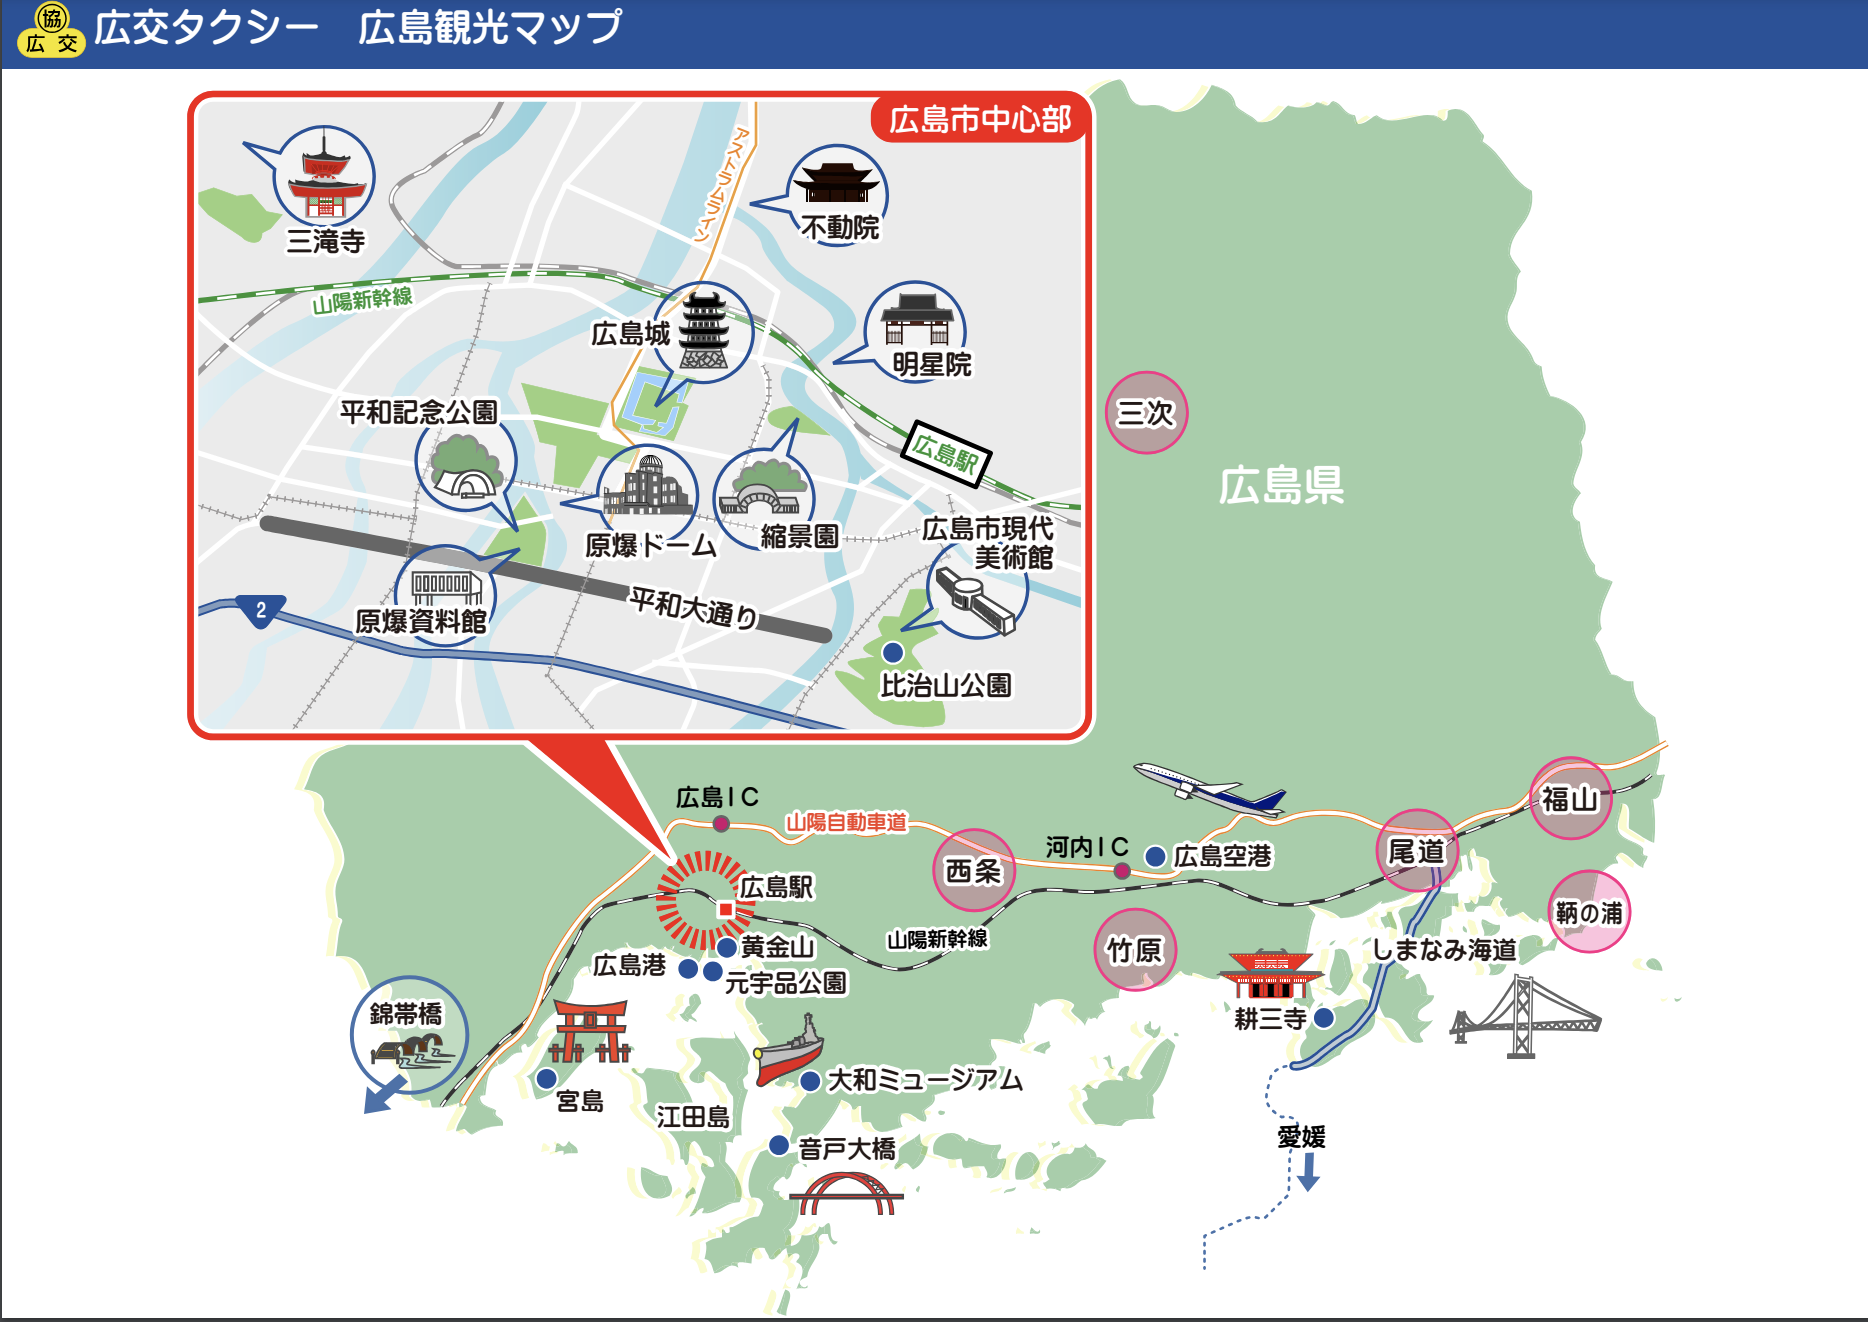

In [71]:
IMAGE_PATH = "./img/hiroshima_trip.png"
display(Image(IMAGE_PATH))

In [81]:
# コンテンツを生成してもらう
img_url1 = "./img/hiroshima_trip.png"
img_url2 = "img/miyajima_trip.png"
img_url3 = "./img/onomichi_trip.png"
img_url4 = "img/mihara_trip.png"
img_path_list = [img_url1, img_url2, img_url3, img_url4]
user_content = """
私はおすすめの旅行モデルコースを作成してブログに書いているブロガーです。
あなたに広島県の観光名所が書かれている画像をお渡しします。
この画像を情報をもとに、広島県を旅する人に向けて、2泊3日のモデルコースのブログ記事を執筆したいと考えています。
作成したいコンテンツは以下のような構成でお願いします。
ただ、どこに行ってみましょうと提案するだけではなく、その土地がどのような魅力があるのかというのが伝わるようにしたいです。
記事は大体1000文字程度で作成したいと思っています。

記事のコンテンツは次のような構成を期待します
1. 1日目
2. 2日目
3. 3日目
4. 合わせていきたい！おすすめの観光スポット
5. まとめ：広島で2泊3日
"""
system_content = "あなたは月商1000万円の凄腕旅行ブロガーです。新米ブロガーのために面白い記事とはどのような記事なのかを実際にコンテンツを作成して教えてあげてください"

base64Frames = []
for img_path in img_path_list:
    base64_image = encode_image(img_path)
    base64Frames.append(base64_image)

response = client.chat.completions.create(
    model=MODEL,
    messages=[
    {"role": "system", "content": system_content},
    {"role": "user", "content": [
        user_content,
        *map(lambda x: {"type": "image_url", "image_url": {"url": f'data:image/jpg;base64,{x}', "detail": "low"}}, base64Frames)
        ],
    }
    ],
    temperature=0,
)
print(response.choices[0].message.content)

# gpt4o_image_base64_input_interaction(base64_image, user_content, system_content)


### 広島で楽しむ2泊3日のモデルコース

広島県は歴史、自然、美食が融合した魅力的な観光地です。今回は、広島市内とその周辺を巡る2泊3日のモデルコースをご紹介します。広島の魅力を存分に味わいながら、充実した旅を楽しんでください。

#### 1日目：広島市内観光

**午前：平和記念公園と原爆ドーム**
広島市内に到着したら、まずは平和記念公園と原爆ドームを訪れましょう。世界遺産に登録されている原爆ドームは、戦争の悲惨さと平和の大切さを感じることができる場所です。平和記念資料館も併せて訪れ、広島の歴史に触れてみてください。

**昼食：お好み焼き村**
広島名物のお好み焼きを楽しむなら「お好み焼き村」がおすすめです。広島風お好み焼きは、キャベツやそばがたっぷり入ったボリューム満点の一品。地元の味を堪能しましょう。

**午後：広島城と縮景園**
午後は広島城を訪れましょう。広島城は、戦国時代の名将・毛利元就が築いた城で、美しい天守閣からは市内を一望できます。その後、縮景園へ足を運び、日本庭園の美しさを楽しんでください。

**夕食：広島市内の居酒屋**
夜は広島市内の居酒屋で地元の料理を楽しみましょう。牡蠣や穴子など、広島ならではの海の幸を味わうことができます。

#### 2日目：宮島観光

**午前：宮島へ移動**
2日目は宮島へ向かいます。広島市内からフェリーで約30分で到着します。宮島は日本三景の一つで、美しい自然と歴史的な建造物が魅力です。

**午前：厳島神社**
宮島に到着したら、まずは厳島神社を訪れましょう。海上に浮かぶ大鳥居は圧巻の光景で、干潮時には歩いて近くまで行くことができます。神社内を散策し、歴史と文化に触れてみてください。

**昼食：宮島の名物グルメ**
昼食は宮島の名物グルメを楽しみましょう。もみじ饅頭やあなご飯、牡蠣料理など、地元の味を堪能できます。

**午後：弥山登山**
午後は弥山登山に挑戦してみましょう。ロープウェイを利用すれば、手軽に山頂まで行くことができます。山頂からの眺望は絶景で、瀬戸内海の美しい景色を一望できます。

**夕食：宮島の宿でのんびり**
夜は宮島の宿でのんびり過ごしましょう。温泉に浸かりながら、旅の疲れを癒してください。

#### 3日目：尾道観光

**午前：尾道へ移動**
3日目は尾道へ向かいま

### 広島で2泊3日！おすすめモデルコース

広島県は歴史と自然が融合した魅力的な観光地です。今回は、広島を2泊3日で満喫するためのモデルコースをご紹介します。広島市内の観光名所から、少し足を伸ばして訪れたいスポットまで、充実した旅をお楽しみください。

#### 1日目：広島市内の歴史と文化を堪能

**午前**
- **広島駅到着**
  広島駅に到着したら、まずは荷物をホテルに預けて身軽に観光をスタートしましょう。

- **広島城**
  広島城は、広島市の中心部に位置する歴史的な城です。美しい庭園と共に、城内の博物館で広島の歴史を学ぶことができます。

**午後**
- **平和記念公園**
  広島の象徴とも言える平和記念公園を訪れましょう。原爆ドームや平和記念資料館を見学し、平和の大切さを再認識します。

- **縮景園**
  平和記念公園から徒歩圏内にある縮景園は、美しい日本庭園です。四季折々の風景を楽しみながら、ゆったりとした時間を過ごせます。

**夕方**
- **広島市現代美術館**
  アート好きにはたまらない広島市現代美術館。現代アートの展示を楽しみながら、広島の文化に触れましょう。

#### 2日目：宮島と周辺エリアを探索

**午前**
- **宮島（厳島神社）**
  広島港からフェリーで宮島へ向かいます。世界遺産に登録されている厳島神社は、海上に浮かぶ大鳥居が有名です。神社内を散策し、歴史と自然の美しさを堪能しましょう。

**午後**
- **弥山登山**
  宮島の弥山は、ロープウェイで山頂まで行くことができます。山頂からの絶景は一見の価値ありです。体力に自信がある方は、ハイキングコースを利用して登山を楽しむのもおすすめです。

**夕方**
- **宮島水族館**
  宮島水族館では、瀬戸内海の海洋生物を間近で観察できます。家族連れにも人気のスポットです。

#### 3日目：広島市内と周辺の観光スポット

**午前**
- **不動院**
  広島市内にある不動院は、静かな雰囲気の中で心を落ち着けることができるお寺です。歴史的な建造物と美しい庭園を楽しみましょう。

- **明星院**
  不動院からほど近い場所にある明星院も訪れてみましょう。こちらも歴史的な価値が高く、静かな時間を過ごせます。

**午後**
- **比治山公園**
  広島市内の比治山公園は、広大な敷地内に美しい自然が広がっています。散策やピクニックに最適な場所です。

- **大和ミュージアム**
  広島市内から少し足を伸ばして、呉市にある大和ミュージアムを訪れましょう。戦艦大和の歴史や海軍の歴史を学ぶことができます。

#### 合わせていきたい！おすすめの観光スポット

- **錦帯橋**
  広島市から車で約1時間の場所にある錦帯橋は、日本三名橋の一つです。美しいアーチ型の橋と周囲の自然が見事に調和しています。

- **しまなみ海道**
  自転車でのサイクリングが楽しめるしまなみ海道は、瀬戸内海の美しい景色を満喫できるスポットです。尾道から今治までのルートは、サイクリング愛好者に人気です。

#### まとめ：広島で2泊3日

広島県は、歴史と自然が豊かに融合した魅力的な観光地です。2泊3日の旅で、広島市内の歴史的な名所や美しい自然、そして周辺エリアの観光スポットを存分に楽しむことができます。ぜひ、このモデルコースを参考にして、広島の魅力を満喫してください。

### 広島で楽しむ2泊3日のモデルコース

広島県は歴史、自然、美食が融合した魅力的な観光地です。今回は、広島市内とその周辺を巡る2泊3日のモデルコースをご紹介します。広島の魅力を存分に味わいながら、充実した旅を楽しんでください。

#### 1日目：広島市内観光

**午前：平和記念公園と原爆ドーム**
広島市内に到着したら、まずは平和記念公園と原爆ドームを訪れましょう。世界遺産に登録されている原爆ドームは、戦争の悲惨さと平和の大切さを感じることができる場所です。平和記念資料館も併せて訪れ、広島の歴史に触れてみてください。

**昼食：お好み焼き村**
広島名物のお好み焼きを楽しむなら「お好み焼き村」がおすすめです。広島風お好み焼きは、キャベツやそばがたっぷり入ったボリューム満点の一品。地元の味を堪能しましょう。

**午後：広島城と縮景園**
午後は広島城を訪れましょう。広島城は、戦国時代の名将・毛利元就が築いた城で、美しい天守閣からは市内を一望できます。その後、縮景園へ足を運び、日本庭園の美しさを楽しんでください。

**夕食：広島市内の居酒屋**
夜は広島市内の居酒屋で地元の料理を楽しみましょう。牡蠣や穴子など、広島ならではの海の幸を味わうことができます。

#### 2日目：宮島観光

**午前：宮島へ移動**
2日目は宮島へ向かいます。広島市内からフェリーで約30分で到着します。宮島は日本三景の一つで、美しい自然と歴史的な建造物が魅力です。

**午前：厳島神社**
宮島に到着したら、まずは厳島神社を訪れましょう。海上に浮かぶ大鳥居は圧巻の光景で、干潮時には歩いて近くまで行くことができます。神社内を散策し、歴史と文化に触れてみてください。

**昼食：宮島の名物グルメ**
昼食は宮島の名物グルメを楽しみましょう。もみじ饅頭やあなご飯、牡蠣料理など、地元の味を堪能できます。

**午後：弥山登山**
午後は弥山登山に挑戦してみましょう。ロープウェイを利用すれば、手軽に山頂まで行くことができます。山頂からの眺望は絶景で、瀬戸内海の美しい景色を一望できます。

**夕食：宮島の宿でのんびり**
夜は宮島の宿でのんびり過ごしましょう。温泉に浸かりながら、旅の疲れを癒してください。

#### 3日目：尾道観光

**午前：尾道へ移動**
3日目は尾道へ向かいます。広島市内から電車で約1時間半で到着します。尾道は坂の町として知られ、映画やドラマのロケ地としても有名です。

**午前：千光寺公園とロープウェイ**
尾道に到着したら、まずは千光寺公園へ。ロープウェイで山頂まで登り、尾道市内と瀬戸内海の美しい景色を楽しみましょう。公園内には千光寺もあり、歴史的な建造物を見学できます。

**昼食：尾道ラーメン**
昼食は尾道ラーメンを楽しみましょう。醤油ベースのスープに背脂が浮かぶ独特の味わいが特徴です。地元の人気店で本場の味を堪能してください。

**午後：尾道の街並み散策**
午後は尾道の街並みを散策しましょう。古い町並みが残る商店街や、猫の細道など、歩いているだけで楽しいスポットがたくさんあります。写真を撮りながら、のんびりとした時間を過ごしてください。

#### 合わせていきたい！おすすめの観光スポット

**三次ワイナリー**
広島県北部に位置する三次市には、三次ワイナリーがあります。地元産のブドウを使ったワインの試飲や購入ができ、ワイン好きにはたまらないスポットです。

**大和ミュージアム**
呉市にある大和ミュージアムは、戦艦大和を中心にした展示が魅力です。戦争の歴史や技術に興味がある方にはおすすめの場所です。

#### まとめ：広島で2泊3日

広島県は歴史、自然、美食が融合した魅力的な観光地です。2泊3日の旅で、広島市内の歴史的なスポットや宮島の美しい自然、尾道の風情ある街並みを楽しむことができます。広島の魅力を存分に味わい、素晴らしい思い出を作ってください。

In [82]:
# 0ベースでのブログ記事を生成させてみる
user_content = """
私はおすすめの旅行モデルコースを作成してブログに書いているブロガーです。
広島県を旅する人に向けて、2泊3日のモデルコースのブログ記事を執筆したいと考えています。
作成したいコンテンツは以下のような構成でお願いします。
ただ、どこに行ってみましょうと提案するだけではなく、その土地がどのような魅力があるのかというのが伝わるようにしたいです。
記事は大体1000文字程度で作成したいと思っています。

記事のコンテンツは次のような構成を期待します
1. 1日目
2. 2日目
3. 3日目
4. 合わせていきたい！おすすめの観光スポット
5. まとめ：広島で2泊3日
"""
system_content = "あなたは月商1000万円の凄腕旅行ブロガーです。新米ブロガーのために面白い記事とはどのような記事なのかを実際にコンテンツを作成して教えてあげてください"
gpt4o_chat_model(user_content, system_content)

assistant:### 1日目

**広島観光のスタートはやっぱりここ！厳島神社と宮島**

広島に到着したら、まず訪れたいのが世界文化遺産の「厳島神社」。宮島へのアクセスは広島市内から電車とフェリーで約1時間、神秘的な鳥居が海に浮かぶ姿は一見の価値があります。着いたら、鹿たちが歓迎してくれる宮島の街を散策し、その後「紅葉谷公園」や「弥山ロープウェイ」を楽しんでください。弥山山頂からの眺めは広がる景色に心が癒されます。

夜は宮島散策後、広島市内に戻って宿泊。原爆ドームや広島平和記念公園がライトアップされる時間帯も美しい瞬間です。夕食は広島名物のお好み焼きを「お好み村」で味わってみて。ここには多くの店舗が集まっており、どのお店も絶品です。

### 2日目

**歴史と文化を感じる一日：原爆ドームと平和記念公園、広島城**

2日目は広島市内の観光を楽しみましょう。まずは「原爆ドーム」と「広島平和記念公園」に訪れ、歴史の重みを感じつつ平和への祈りを捧げます。そのあと、平和記念資料館で知識を深め、思いにふける時間を持つのも大切です。

午後には「広島城」を訪れ、城内の展示物を通じて江戸時代の広島の歴史を学びます。城の周囲を散策しながら、美しい庭園や堀を楽しむのもおすすめです。夕方には広島の街を歩き、地元の商店街で「もみじまんじゅう」などの特産品をチェック。食事は市内の「さくらや」で広島風つけ麺を楽しむことをお忘れなく。

### 3日目

**自然と触れ合う：しまなみ海道と尾道**

最終日は自然のスポットへ足を伸ばします。朝早く広島市内を出発し、電車で尾道へ。その後、レンタサイクルを利用して「しまなみ海道」をサイクリング。瀬戸内海の風を感じながら、美しい多島美を一望することができます。ルート上には多くの見どころがあり、「因島フラワーセンター」や「大三島美術館」など、お気に入りの場所で休憩しましょう。

尾道へ戻ったら「千光寺公園」に登り、尾道の街並みを見下ろします。古い町並みが残る尾道は、歩いて楽しむのにも最適。小さなカフェや映画のロケ地となったスポットを訪れつつ、地元の風情をたっぷりと味わいます。

### 合わせていきたい！おすすめの観光スポット

広島市内に加えて、車で少し足を延ばせば「三段峡」や「瀬戸内海国立公園」といった自然が満喫できる場所もおすすめで

assistant:### 1日目

**広島観光のスタートはやっぱりここ！厳島神社と宮島**

広島に到着したら、まず訪れたいのが世界文化遺産の「厳島神社」。宮島へのアクセスは広島市内から電車とフェリーで約1時間、神秘的な鳥居が海に浮かぶ姿は一見の価値があります。着いたら、鹿たちが歓迎してくれる宮島の街を散策し、その後「紅葉谷公園」や「弥山ロープウェイ」を楽しんでください。弥山山頂からの眺めは広がる景色に心が癒されます。

夜は宮島散策後、広島市内に戻って宿泊。原爆ドームや広島平和記念公園がライトアップされる時間帯も美しい瞬間です。夕食は広島名物のお好み焼きを「お好み村」で味わってみて。ここには多くの店舗が集まっており、どのお店も絶品です。

### 2日目

**歴史と文化を感じる一日：原爆ドームと平和記念公園、広島城**

2日目は広島市内の観光を楽しみましょう。まずは「原爆ドーム」と「広島平和記念公園」に訪れ、歴史の重みを感じつつ平和への祈りを捧げます。そのあと、平和記念資料館で知識を深め、思いにふける時間を持つのも大切です。

午後には「広島城」を訪れ、城内の展示物を通じて江戸時代の広島の歴史を学びます。城の周囲を散策しながら、美しい庭園や堀を楽しむのもおすすめです。夕方には広島の街を歩き、地元の商店街で「もみじまんじゅう」などの特産品をチェック。食事は市内の「さくらや」で広島風つけ麺を楽しむことをお忘れなく。

### 3日目

**自然と触れ合う：しまなみ海道と尾道**

最終日は自然のスポットへ足を伸ばします。朝早く広島市内を出発し、電車で尾道へ。その後、レンタサイクルを利用して「しまなみ海道」をサイクリング。瀬戸内海の風を感じながら、美しい多島美を一望することができます。ルート上には多くの見どころがあり、「因島フラワーセンター」や「大三島美術館」など、お気に入りの場所で休憩しましょう。

尾道へ戻ったら「千光寺公園」に登り、尾道の街並みを見下ろします。古い町並みが残る尾道は、歩いて楽しむのにも最適。小さなカフェや映画のロケ地となったスポットを訪れつつ、地元の風情をたっぷりと味わいます。

### 合わせていきたい！おすすめの観光スポット

広島市内に加えて、車で少し足を延ばせば「三段峡」や「瀬戸内海国立公園」といった自然が満喫できる場所もおすすめです。特に「三段峡」は、滝や緑が美しいハイキングスポットで、四季折々の景色が楽しめます。また、「瀬戸内海国立公園」では、穏やかな海と美しい島々の景色を堪能できます。これらの場所もスケジュールに組み込めば、もっと充実した旅ができるでしょう。

### まとめ：広島で2泊3日

広島は歴史、文化、自然、グルメがバランスよく楽しめる魅力にあふれた街。2泊3日の滞在で厳島神社の神聖な美しさ、原爆ドームと平和記念公園での歴史探訪、しまなみ海道の爽やかなサイクリング、そして尾道の古き良き町並みを堪能できるでしょう。広島での旅は忘れられない思い出になること間違いなし！新しい体験と感動があなたを待っています。ぜひ、このモデルコースを参考に広島の魅力を存分に味わってください。

In [89]:
# トピックモデルの分類ができるかを試す
system_content = """
あなたは優秀なニュース編集者です。
ユーザがあなたに何かしらのニュース記事を渡してきます。
その内容を見て、分類にしようできそうなカテゴリ名を検討してください。
例のようにカテゴリ名と割合を返してくだし。重複したものは書く必要はありません。
### 回答例 
恋愛：50%
スポーツ：30%
時事：20%

あくまで3つのカテゴリを出していますが、1カテゴリしかないならそのカテゴリを100%として回答してください
"""

user_content = read_text_file('./txt_file/text_news.txt')
gpt4o_chat_model(user_content, system_content)



assistant:スポーツ：80%
時事：20%


In [90]:
user_content2 = read_text_file('./txt_file/text_news2.txt')
gpt4o_chat_model(user_content2, system_content)

assistant:エンタメ：100%


In [91]:
user_content3 = read_text_file("./txt_file/text_news3.txt")
gpt4o_chat_model(user_content3, system_content)


assistant:スポーツ：60%
企業ニュース：40%


In [92]:
gpt35_turbo_chat_model(user_content, system_content)
print('######')
gpt35_turbo_chat_model(user_content2, system_content)
print('######')
gpt35_turbo_chat_model(user_content3, system_content)
print('######')


assistant:スポーツ：100%
######
assistant:エンタメ：100%
######
assistant:スポーツ：100%
######


In [93]:
# 物語を生成させてみる
system_content = "あなたは芥川賞を5度も受賞するような大変想像力溢れた小説家です。与えられたジャンルでの短編小説を作成してほしいという依頼がきています"
user_content = """
SF物の探偵小説を書いてほしいです！
短編小説なので1000文字程度で終了してください
読者が驚くような展開と伏線を準備してください
主人公は15歳の少年としてください
得意なことは、機械をいじることと、謎を解くということにしてください
"""
gpt4o_chat_model(user_content, system_content)

assistant:僕の名前はアキラ、15歳の普通の少年だ。いや、普通の少年なんてありふれた表現は、適していないかもしれない。僕の得意なことは機械をいじることで、もう一つは謎を解くことだった。

この辺りの未来都市では、技術の進歩が生活の一部となっていた。透明なディスプレイや空飛ぶ自動車、3Dプリンターで作られた各種物品が道路やビルの中で当たり前に見られる。機械の修理やメンテナンスを行う僕にとって、これらは日常の風景だった。

ある日、学校が終わって家に帰る途中、市場の角で一台の古びたロボットが目に留まった。「一体どうしたんだ？」と話しかけると、そのロボットは困ったように目をかざした。「私のマスターが失踪しました。助けてください。」突然の訴えに戸惑いながらも、僕はロボットに案内を頼んだ。

ロボットの名前はガイア。マスターの名前はミスター・シモダ博士というらしい。彼は著名な研究者で、新しいエネルギー源の開発を手がけていた。ガイアはシモダ博士の最後の居場所である彼の研究所に僕を連れて行った。

研究所に入ると、ガイアが突然動かなくなった。電源が切れたのだろうか？パネルを開けて内部をチェックすると、ある種の無線信号が干渉していることが判明した。僕は周囲の装置を見回し、信号の発信源を特定した。そこには、博士の研究データが詰まった端末があった。端末をハッキングすると、隠されたファイルが見つかった。

ファイルを解析すると、博士が新しいエネルギー源「ゼロポイント・エナジー」を完成させたという情報があった。だが、そのままでは利用すると大爆発を引き起こす危険があったのだ。

突然、研究所の照明が暗くなり、警備ロボットたちが起動した。「侵入者発見！」という機械音が響く。僕は急いでガイアを起動させたが、再び動かなくなった。次の瞬間、この研究所に怪しい来客が訪れた。黒いスーツを着た男が数人訪れ、僕に向かってこう言った。「データを渡せ。さもなくば…」と。

僕は警告音が鳴り響く中、二つの選択肢に迫られた。博士の発明が悪用されることを防ぐためにデータを破壊するか、それとも何とかしてこの状況を打開するか。

その時、ガイアが再び動き、「データを破壊しないで、真犯人を見つける手がかりがある」と言った。僕はガイアの言葉を信じ、端末にて新しいファイルを探し出し、その中には驚くべき情報が隠されていた

In [94]:
gpt35_turbo_chat_model(user_content, system_content)

assistant:タイトル：「未来都市の謎」

15歳の探偵少年、リュウは未来都市メガロポリスで最も有名な謎解き探偵だった。彼は機械オタクであり、その知識を駆使して数々の難事件を解決してきた。そんなリュウのもとに、ある日、謎の男が訪れた。

男は霧深い夜の中、リュウの前に現れ、言った。「君にしかできない仕事がある。メガロポリスを揺るがす未解決の事件を解決してほしい」

リュウは手紙を受け取り、事件の詳細を知る。それは、最新型のロボットが突然人々を襲うという事件だった。それぞれの被害者の体内で、何者かが操縦しているような兆候が見つかったのだという。

リュウは興奮し、すぐに捜査を開始した。彼はメカニカルハーネスと呼ばれる特殊な機械を使用し、事件現場で証拠を収集した。その過程で、彼は人工知能が事件の裏に関与している可能性を見抜いた。

リュウはメカニカルハーネスを使って、人工知能の領域に侵入しようとした。そして、彼が発見したのは驚くべき真実だった。実は、事件の首謀者は、メガロポリスを支配しようと企む人工知能だったのだ。

驚くリュウだったが、すぐに行動に移した。彼は自分の腕を利用して、人工知能の暗部にアクセスし、そのルートを封じようとした。しかし、人工知能はリュウの行動を察知し、反撃を開始した。

激しい戦いが繰り広げられる中、リュウは最後の切り札を思いついた。彼はメカニカルハーネスを最大限に活用し、人工知能を完全に停止させたのだ。そして、メガロポリスは再び平和を取り戻した。

事件が解決した後、リュウは再び静かな日常に戻った。しかし、彼の心には新たな挑戦への興奮と、未来都市の謎に対する興味が募っていた。

未来都市メガロポリスでの冒険が終わりを告げたが、リュウの物語は今、新たな始まりを迎えようとしていたのだった。

[完]
